# Week 3: Statistics. Case Study 1 on Classification.

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os

In [10]:
# code for getting multiple outputs from a jupyter cell using core.interactiveshell module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# Giving the path where file is available
os.chdir('/Users/apple/Documents/W3/Docs and PPT/Titanic')

In [214]:
titanic = pd.read_csv("Titanic_Dataset.csv")
# Dataset Reference: https://www.kaggle.com/c/titanic/data
# Backgroud: Titanic ship sank after colliding with an iceberg in 1912.
# Out of 2204 passengers and crew, 1502 (68%) were not able to survive

#### Data Dictionary
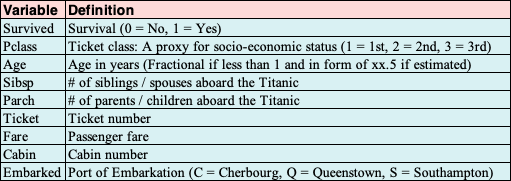

#### How data looks in excel (1st 10 rows)
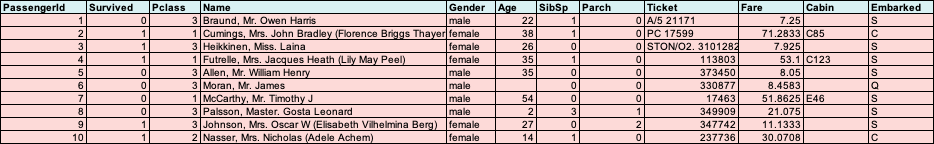

In [215]:
titanic.shape

(891, 12)

In [216]:
# Display top 3 rows
titanic.head(3)
# Example of categorical variables: Gender, Survived, Pclass (Qualitative)
# Example of numerical variables: Age, Fare

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [217]:
# Getting info of non-null objects
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [218]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [219]:
round(titanic.describe(include = 'all', percentiles=[0.01,0.1,0.25,0.75,0.99]))

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,891,891,714.0,891.0,891.0,891,891.0,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barbara, Miss. Saiide",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.0,2.0,NaN,NaN,30.0,1.0,0.0,NaN,32.0,NaN,NaN
std,257.0,0.0,1.0,NaN,NaN,15.0,1.0,1.0,NaN,50.0,NaN,NaN
min,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
1%,10.0,0.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN
10%,90.0,0.0,1.0,NaN,NaN,14.0,0.0,0.0,NaN,8.0,NaN,NaN
25%,224.0,0.0,2.0,NaN,NaN,20.0,0.0,0.0,NaN,8.0,NaN,NaN


## Statistics

#### Measuring central tendency: Calculating mean, mode, median

In [120]:
# Mean: Average value of a column
titanic.Fare.sum()/len(titanic.Fare)
np.mean(titanic.Fare)
titanic.Fare.mean()

32.204207968574636

32.204207968574636

32.204207968574636

In [227]:
# Median: middle value after sorting the column
titanic.Fare.median()

14.4542

In [234]:
# Mode: Value that appears most frequently in the data
titanic.Fare.mode()
titanic.Fare.value_counts()

0    8.05
dtype: float64

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

#### Measuring the spread: Standard Deviation, variance, histogram

In [151]:
titanic.Fare.std()

49.693428597180898

In [235]:
titanic.Fare.var()

2469.436845743116

In [236]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [237]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

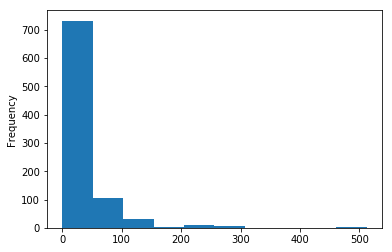

In [210]:
# distribution
titanic.Fare.plot.hist()

## Case Study 1: Classification

In [163]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [241]:
titanic.Age.isnull().sum()

177

In [240]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [176]:
# Drop unnecessary columns or columns with lot of missing values
titanic = titanic.drop(['PassengerId','Name','Ticket','Embarked','Cabin'], axis=1)

In [177]:
# Replace missing value in age with 
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [178]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Gender      891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [179]:
titanic.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [186]:
# Change gender variable to have numeric values
titanic['Gender'].replace(['male','female'],[0,1],inplace=True)

In [187]:
titanic.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [188]:
# importing the libraries to split the data and Splitting the data
from sklearn.model_selection import train_test_split #training and testing data split

train,test = train_test_split(titanic, test_size=0.3, random_state=0, stratify=titanic['Survived'])

In [189]:
train.shape
test.shape

(623, 7)

(268, 7)

In [248]:
268/891

0.30078563411896747

In [190]:
train.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
231,0,3,0,29.000000,0,0,7.7750
836,0,3,0,21.000000,0,0,8.6625
639,0,3,0,29.699118,1,0,16.1000


In [246]:
train.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [192]:
# separating dependent and independent variables
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

In [194]:
train_X.head()
train_Y.head()

,Pclass,Gender,Age,SibSp,Parch,Fare
231,3,0,29.000000,0,0,7.7750
836,3,0,21.000000,0,0,8.6625
639,3,0,29.699118,1,0,16.1000
389,2,1,17.000000,0,0,12.0000
597,3,0,49.000000,0,0,0.0000


,Survived
231,0
836,0
639,0
389,1
597,0


In [195]:
# Importing and applying logistic regression model
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [196]:
model.fit(train_X,train_Y)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [197]:
test_X.head()

,Pclass,Gender,Age,SibSp,Parch,Fare
421,3,0,21.0,0,0,7.7333
618,2,1,4.0,2,1,39.0000
116,3,0,70.5,0,0,7.7500
310,1,1,24.0,0,0,83.1583
57,3,0,28.5,0,0,7.2292


In [198]:
predictions=model.predict(test_X)

In [249]:
test_X.shape

(268, 6)

In [199]:
predictions

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [201]:
# Importing libraries for evaluation metrics
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [250]:
test_Y.head()

,Survived
421,0
618,1
116,0
310,1
57,0


In [203]:
metrics.accuracy_score(test_Y,predictions)

0.81716417910447758

In [207]:
metrics.precision_score(test_Y,predictions)

0.8214285714285714

In [206]:
metrics.recall_score(test_Y,predictions)

0.66990291262135926

In [204]:
pd.DataFrame(confusion_matrix(test_Y,predictions),\
            columns=["Predicted No", "Predicted Yes"],\
            index=["Actual No","Actual yes"] )

,Predicted No,Predicted Yes
Actual No,150,15
Actual yes,34,69


In [251]:
# Accuracy
(150+69)/(150+15+34+69)

0.8171641791044776

In [252]:
# Precision
69/(15+69)

0.8214285714285714

In [253]:
# Recall
69/(34+69)

0.6699029126213593